In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
# Load three years of data
df_load_2013 = pd.read_csv('./test_simulink/E-load-2013.csv')
df_load_2014 = pd.read_csv('./test_simulink/E-load-2014.csv')
df_load_2015 = pd.read_csv('./test_simulink/E-load-2015.csv')
df_weather_2013 = pd.read_csv('./test_simulink/E-2013.csv')
df_weather_2014 = pd.read_csv('./test_simulink/E-2014.csv')
df_weather_2015 = pd.read_csv('./test_simulink/E-2015.csv')

df_load = pd.concat([df_load_2013, df_load_2014, df_load_2015])
df_weather = pd.concat([df_weather_2013, df_weather_2014, df_weather_2015])
print(len(df_load))
print(len(df_weather))

1576800
26280


In [28]:
# First column of df_load is a timestamp, second is load in Watts
# Columns: ['DD/MM/YYYY HH:MM', 'Load (Watt)']
# The data is minute-by-minute
df_load

,DD/MM/YYYY HH:MM,Load (Watt)
0,01/01/2013 00:00,38517
1,01/01/2013 00:01,38205
2,01/01/2013 00:02,38069
3,01/01/2013 00:03,37922
4,01/01/2013 00:04,37594
...,...,...
525595,31/12/2015 23:55,25102
525596,31/12/2015 23:56,24630
525597,31/12/2015 23:57,24144
525598,31/12/2015 23:58,23993


In [29]:
# Columns: local_time_no_dst	wind_speed	irradiance_direct	irradiance_diffuse	temperature	irradiance_total
# The data is hour-by-hour
df_weather['irradiance_total'] = df_weather['irradiance_direct'] + df_weather['irradiance_diffuse']
df_weather

,local_time_no_dst,wind_speed,irradiance_direct,irradiance_diffuse,temperature,irradiance_total
0,2013-01-01 00:00:00,11.281,0.0,0.0,2.665,0.0
1,2013-01-01 01:00:00,11.418,0.0,0.0,2.569,0.0
2,2013-01-01 02:00:00,11.162,0.0,0.0,2.587,0.0
3,2013-01-01 03:00:00,10.769,0.0,0.0,2.566,0.0
4,2013-01-01 04:00:00,10.979,0.0,0.0,2.692,0.0
...,...,...,...,...,...,...
8755,2015-12-31 19:00:00,13.495,0.0,0.0,3.794,0.0
8756,2015-12-31 20:00:00,13.620,0.0,0.0,3.203,0.0
8757,2015-12-31 21:00:00,13.134,0.0,0.0,2.600,0.0
8758,2015-12-31 22:00:00,12.575,0.0,0.0,2.286,0.0


In [30]:
# Change the time column names
df_weather['timestamp'] = df_weather['local_time_no_dst']
df_weather = df_weather.drop(columns=['local_time_no_dst'])

df_load['timestamp'] = df_load['DD/MM/YYYY HH:MM']
df_load = df_load.drop(columns=['DD/MM/YYYY HH:MM'])

# Convert to datetime
df_load['timestamp'] = pd.to_datetime(df_load['timestamp'], format='%d/%m/%Y %H:%M')
df_weather['timestamp'] = pd.to_datetime(df_weather['timestamp'], format='%Y-%m-%d %H:%M:%S')
# df_load columns are now: ['timestamp', 'Load (Watt)']
# df_weather columns are now: ['wind_speed', 'irradiance_direct', 'irradiance_diffuse', 'temperature', 'irradiance_total', 'timestamp']

In [31]:
# Average load
print('Average load: ', df_load['Load (Watt)'].mean())
usage_per_yr = df_load['Load (Watt)'].mean() * (24*365*3600)/3.6e6

print(usage_per_yr, 'kWh per year')
num_houses = 160
usage_per_houseyear = usage_per_yr / num_houses

print(usage_per_houseyear, 'kWh per house per year') 


Average load:  42437.18727866565
371749.7605611111 kWh per year
2323.4360035069444 kWh per house per year


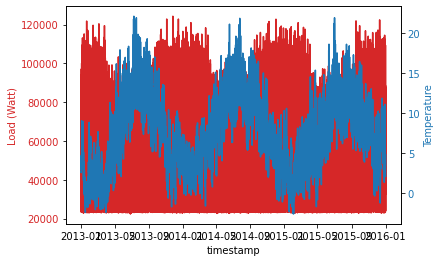

In [32]:
# Ensure timestamps are sorted
df_load = df_load.sort_values(by='timestamp')
df_weather = df_weather.sort_values(by='timestamp')

# Create a figure and a set of subplots
fig, ax1 = plt.subplots()
# Plot 'Load (Watt)' on y-axis and 'timestamp' on x-axis
color = 'tab:red'
ax1.set_xlabel('timestamp')
ax1.set_ylabel('Load (Watt)', color=color)
ax1.plot(df_load['timestamp'], df_load['Load (Watt)'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Instantiate a second y-axis sharing the same x-axis
ax2 = ax1.twinx()  

# Plot 'temperature' on second y-axis
color = 'tab:blue'
ax2.set_ylabel('Temperature', color=color)  
ax2.plot(df_weather['timestamp'], df_weather['temperature'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Show the plot
plt.show()

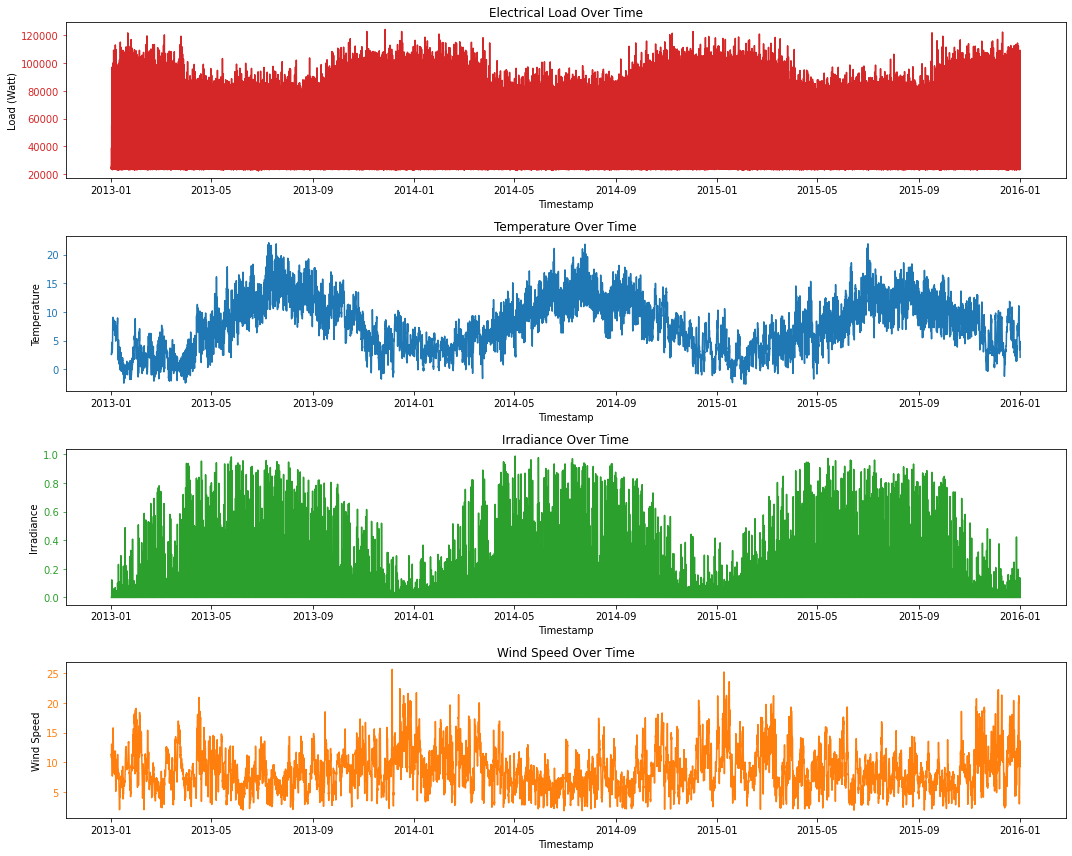

In [33]:
# Creating a figure for the plots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 12))

# Plotting 'Load (Watt)' from df_load
ax1.plot(df_load['timestamp'], df_load['Load (Watt)'], color='tab:red')
ax1.set_title('Electrical Load Over Time')
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Load (Watt)')
ax1.tick_params(axis='y', colors='tab:red')

# Plotting 'temperature' from df_weather
ax2.plot(df_weather['timestamp'], df_weather['temperature'], color='tab:blue')
ax2.set_title('Temperature Over Time')
ax2.set_xlabel('Timestamp')
ax2.set_ylabel('Temperature')
ax2.tick_params(axis='y', colors='tab:blue')

# Plotting 'irradiance_total' from df_weather
ax3.plot(df_weather['timestamp'], df_weather['irradiance_total'], color='tab:green')
ax3.set_title('Irradiance Over Time')
ax3.set_xlabel('Timestamp')
ax3.set_ylabel('Irradiance')
ax3.tick_params(axis='y', colors='tab:green')

# Plot wind speed from df_weather
ax4.plot(df_weather['timestamp'], df_weather['wind_speed'], color='tab:orange')
ax4.set_title('Wind Speed Over Time')
ax4.set_xlabel('Timestamp')
ax4.set_ylabel('Wind Speed')
ax4.tick_params(axis='y', colors='tab:orange')


# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [34]:
# Plot moving averages of load, temperature, irradiance, and wind speed


# Print max value of total irradiance
print('Max irradiance: ', df_weather['irradiance_total'].max())
print(df_weather['irradiance_total'].mean())
print(df_weather['wind_speed'].mean())

area_house = 80 # in m^2
average_panel_size = 1.6 # in m^2
panel_efficiency = 0.2
solar_price_per_wp = 3 # in USD

Max irradiance:  0.989
0.1319505707762557
8.745095167427701


In [35]:
# Calculate the total solar power that can be installed
total_solar_power = area_house * average_panel_size * panel_efficiency

# Irradiance in df_weather is given in 1kW/m^2
# Calculate the total solar power that would be produced 

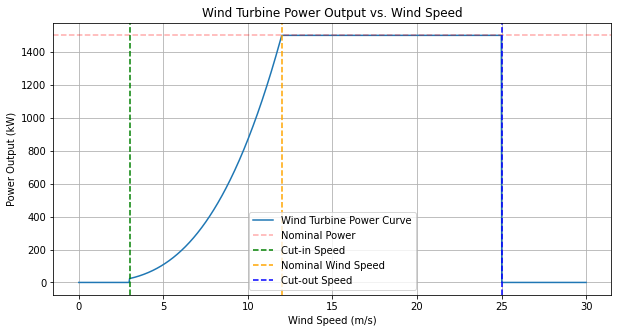

In [36]:
def wind_turbine_power_curve(nominal_power, nominal_wind_speed, cut_out_speed, cut_in_speed):
    """
    Generate a power curve for a wind turbine based on the given parameters.
    
    Parameters:
    nominal_power (float): Nominal power output in kilowatts [kW].
    nominal_wind_speed (float): Wind speed at which turbine reaches nominal power [m/s].
    cut_out_speed (float): Wind speed at which turbine shuts down to prevent damage [m/s].
    cut_in_speed (float): Minimum wind speed required for power generation [m/s].
    
    Returns:
    wind_speeds (numpy.array): Array of wind speeds [m/s].
    power_output (numpy.array): Array of power outputs [kW].
    """
    # Generate wind speeds from 0 to a bit beyond the cut-out speed
    wind_speeds = np.linspace(0, cut_out_speed + 5, num=1000)
    # Initialize the power output array
    power_output = np.zeros_like(wind_speeds)

    # Power output computation
    power_output = np.piecewise(wind_speeds, 
                                [wind_speeds < cut_in_speed,
                                 (wind_speeds >= cut_in_speed) & (wind_speeds <= nominal_wind_speed),
                                 (wind_speeds > nominal_wind_speed) & (wind_speeds <= cut_out_speed),
                                 wind_speeds > cut_out_speed],
                                [0,
                                 lambda x: ((x/cut_in_speed)**3) * nominal_power / ((nominal_wind_speed/cut_in_speed)**3),
                                 nominal_power,
                                 0])

    return wind_speeds, power_output

# Define parameters
nominal_power = 1500  # in kW
nominal_wind_speed = 12  # in m/s
cut_out_speed = 25  # in m/s
cut_in_speed = 3  # in m/s

# Generate the power curve data
wind_speeds, power_output = wind_turbine_power_curve(nominal_power, nominal_wind_speed, cut_out_speed, cut_in_speed)

# Plot the power curve
plt.figure(figsize=(10, 5))
plt.plot(wind_speeds, power_output, label='Wind Turbine Power Curve')
plt.axhline(y=nominal_power, color='r', linestyle='--', alpha = 0.33, label='Nominal Power')
plt.axvline(x=cut_in_speed, color='g', linestyle='--', label='Cut-in Speed')
plt.axvline(x=nominal_wind_speed, color='orange', linestyle='--', label='Nominal Wind Speed')
plt.axvline(x=cut_out_speed, color='b', linestyle='--', label='Cut-out Speed')
plt.title('Wind Turbine Power Output vs. Wind Speed')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power Output (kW)')
plt.legend()
plt.grid(True)
plt.show()


In [43]:
class WindTurbine:
    """
    A class to model a wind turbine's power output characteristics.
    
    Attributes:
    blade_radius (float): Blade radius in meters [m].
    performance_coefficient (float): Performance coefficient, no unit [-].
    air_density (float): Air density in kilograms per cubic meter [kg/m^3].
    nominal_power (float): Nominal power output in kilowatts [kW].
    nominal_wind_speed (float): Wind speed at which turbine reaches nominal power [m/s].
    cut_out_speed (float): Wind speed at which turbine shuts down to prevent damage [m/s].
    cut_in_speed (float): Minimum wind speed required for power generation [m/s].
    """
    
    def __init__(self, blade_radius, performance_coefficient, air_density, 
                 nominal_power, nominal_wind_speed, cut_out_speed, cut_in_speed):
        self.blade_radius = blade_radius
        self.performance_coefficient = performance_coefficient
        self.air_density = air_density
        self.nominal_power = nominal_power
        self.nominal_wind_speed = nominal_wind_speed
        self.cut_out_speed = cut_out_speed
        self.cut_in_speed = cut_in_speed
    
    def get_power_simple(self, wind_speeds):
        """
        Calculate the power output of the wind turbine using a simplified version of the
        actual power curve.
        
        Parameters:
        wind_speeds (numpy.array): An array of wind speeds in meters per second [m/s].
        
        Returns:
        numpy.array: An array of power outputs in kilowatts [kW].
        """
        # Using piecewise to define the power output for different wind speed segments
        power_output = np.piecewise(wind_speeds,
            [wind_speeds < self.cut_in_speed,
                (wind_speeds >= self.cut_in_speed) & (wind_speeds <= self.nominal_wind_speed),
                (wind_speeds > self.nominal_wind_speed) & (wind_speeds < self.cut_out_speed),
                wind_speeds >= self.cut_out_speed],
            [0,
                lambda x: (x / self.nominal_wind_speed)**3 * self.nominal_power,
                self.nominal_power,
                0])
        return power_output
    
    def get_power_physical(self, wind_speeds):
        """
        Calculate the power output of the wind turbine using physical properties.
        
        Parameters:
        wind_speeds (numpy.array): An array of wind speeds in meters per second [m/s].
        
        Returns:
        numpy.array: An array of power outputs in kilowatts [kW].
        """
        # Calculate the area of the circle the blades cover
        area = np.pi * self.blade_radius**2
        
        # Calculate the power using the formula:
        # P = 0.5 * cp * rho * A * V^3
        # Where P is the power in watts, cp is the performance coefficient,
        # rho is the air density, A is the swept area of the blades, and
        # V is the wind speed in m/s.
        power_output = 0.5 * self.performance_coefficient * self.air_density * area * wind_speeds**3
        
        # Convert watts to kilowatts
        power_output /= 1000
        
        # Apply cut-in and cut-out speeds
        power_output = np.where(
            (wind_speeds >= self.cut_in_speed) & (wind_speeds < self.cut_out_speed),
            power_output,
            0
        )
        
        # Limit power to nominal power
        power_output = np.where(
            power_output > self.nominal_power,
            self.nominal_power,
            power_output
        )
        
        return power_output
    
    def get_capacity_factor(self, wind_speeds, years):
        """
        Calculate the capacity factor of the wind turbine.
        
        Parameters:
        wind_speeds (numpy.array): An array of wind speeds in meters per second [m/s].
        years (int): The number of years to calculate the capacity factor over.
        
        Returns:
        float: The capacity factor as a percentage [%].
        """
        # Calculate the power output in kilowatts [kW]
        power_output = self.get_power_physical(wind_speeds)
        
        # Convert to kilowatt-hours [kWh]
        power_output /= 1000
        
        # Calculate the number of hours in a year
        hours_per_year = 365 * 24
        
        # Calculate the capacity factor as a percentage [%]
        capacity_factor = power_output.sum() / (self.nominal_power * years * hours_per_year) * 100
        
        return capacity_factor


class WindFarm:
    """
    A class that contains multiple wind turbines.
    Attributes:
    turbines (list): A list of WindTurbine objects.
    """

    def __init__(self, turbines):
        self.turbines = turbines

    def get_power_output_simple(self, wind_speeds):
        """
        Calculate the total power output of the wind farm using a simple cubic formula.
        Parameters:
        wind_speeds (numpy.array): An array of wind speeds in meters per second [m/s].
        Returns:
        numpy.array: An array of power outputs in kilowatts [kW].
        """
        power_output = np.zeros(len(wind_speeds))
        for turbine in self.turbines:
            power_output += turbine.get_power_simple(wind_speeds)
        return power_output

    def get_power_output_physical(self, wind_speeds):
        """
        Calculate the total power output of the wind farm using physical properties.
        Parameters:
        wind_speeds (numpy.array): An array of wind speeds in meters per second [m/s].
        Returns:
        numpy.array: An array of power outputs in kilowatts [kW].
        """
        power_output = np.zeros(len(wind_speeds))
        for turbine in self.turbines:
            power_output += turbine.get_power_physical(wind_speeds)
        return power_output
    
    def get_annual_energy_production(self, wind_speeds):
        """
        Calculate the annual energy production of the wind farm.
        Parameters:
        wind_speeds (numpy.array): An array of wind speeds in meters per second [m/s].
        Returns:
        float: The annual energy production in kilowatt-hours [kWh].
        """
        # Calculate the power output in kilowatts [kW]
        power_output = self.get_power_output_physical(wind_speeds)
        
        # Convert to kilowatt-hours [kWh]
        power_output /= 1000
        
        # Calculate the number of hours in a year
        hours_per_year = 365 * 24
        
        # Calculate the annual energy production in kilowatt-hours [kWh]
        annual_energy_production = power_output.sum() * hours_per_year
        
        return annual_energy_production
    
    def get_total_nominal_power(self):
        """
        Calculate the total nominal power of the wind farm.
        Returns:
        float: The total nominal power in kilowatts [kW].
        """
        total_nominal_power = 0
        for turbine in self.turbines:
            total_nominal_power += turbine.nominal_power
        return total_nominal_power
    
    def get_capacity_factor(self, wind_speeds, years):
        """
        Calculate the capacity factor of the wind farm.
        Parameters:
        wind_speeds (numpy.array): An array of wind speeds in meters per second [m/s].
        years (int): The number of years to calculate the capacity factor over.
        Returns:
        float: The capacity factor as a percentage [%].
        """
        # Calculate the total energy production in kilowatt-hours [kWh]
        energy_production = self.get_annual_energy_production(wind_speeds)
        
        # Calculate the total nominal power in kilowatts [kW]
        total_nominal_power = self.get_total_nominal_power()
        
        # Calculate the capacity factor as a percentage [%]
        capacity_factor = energy_production / (total_nominal_power * years * 8760) * 100
        
        return capacity_factor


turbine = WindTurbine(
    blade_radius=5,  # Urban wind turbine size
    performance_coefficient=16/27,  # From matlab
    air_density=1.225,  # For air at sea level
    nominal_power=20,  # 
    nominal_wind_speed=15,  # From matlab
    cut_out_speed=25,  # From matlab
    cut_in_speed=5  # From matlab
)
power_output = turbine.get_power_simple(df_weather['wind_speed'].to_numpy())
print(len(df_weather))
print(len(power_output))

# wind_farm = WindFarm([turbine])
# power_output = wind_farm.get_power_output_simple(df_weather['wind_speed'])

# # Print capacity factor
# print('Capacity factor: ', wind_farm.get_capacity_factor(df_weather['wind_speed'], 3))

# wind_speeds = np.array([5, 10, 15, 20, 25, 30])  # Example wind speeds in m/s
# print(turbine.get_power_simple(wind_speeds))
# print(turbine.get_power_physical(wind_speeds))

#

# # Plot power output vs time for wind turbine
# plt.figure(figsize=(16, 10))
# plt.plot(df_weather['timestamp'], power_output)
# plt.title('Wind Turbine Power Output Over Time')
# plt.xlabel('Timestamp')
# plt.ylabel('Power Output (kW)')
# plt.show()



26280
26280
